<a href="https://colab.research.google.com/github/mahesh-keswani/ML-DL-Basics/blob/main/keras_examples/RegularizationForANN_CNN_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Resource: https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization/

# We will use a standard binary classification problem
from sklearn.datasets import make_moons
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2, l1, l1_l2

In [2]:
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

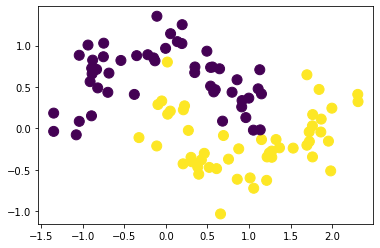

In [5]:
plt.scatter( X[:, 0], X[:, 1], c=y, s=100 );

In [6]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=1000, verbose=0)

<h1>Without regularization</h1>

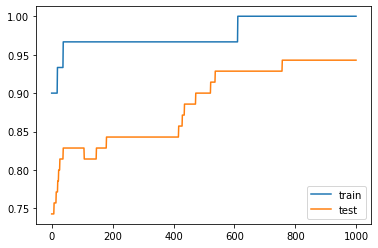

In [11]:
# summarize history for accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend();

In [12]:
# We can see an expected shape of an overfit model where test accuracy increases to a point and then begins to decrease again.

<h1>With regularization</h1>

In [16]:
# MLP Model With Weight Regularization
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(0.001) ))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=1000, verbose=0)

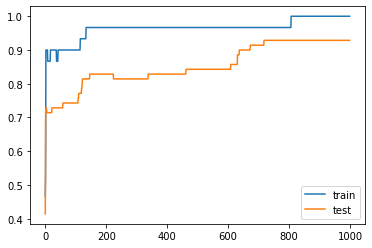

In [19]:
# summarize history for accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend();

In [20]:
# As expected, we see the learning curve on the test dataset rise and then plateau, indicating that the model may not have overfit the training dataset.

<h1>Grid Search Regularization Hyperparameter</h1>

In [22]:
'''
    Once we can confirm that weight regularization may improve your overfit model, we can test different values of the regularization parameter.
    It is a good practice to first grid search through some orders of magnitude between 0.0 and 0.1, then once a level is found, to grid search on that level.
'''

'\n    Once we can confirm that weight regularization may improve your overfit model, we can test different values of the regularization parameter.\n    It is a good practice to first grid search through some orders of magnitude between 0.0 and 0.1, then once a level is found, to grid search on that level.\n'

In [23]:
# grid search values
values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
all_train, all_test = list(), list()

for param in values:
	# define model
	model = Sequential()
	model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(param)))
	model.add(Dense(1, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit model
	model.fit(trainX, trainy, epochs=500, verbose=0)
	# evaluate the model
	_, train_acc = model.evaluate(trainX, trainy, verbose=0)
	_, test_acc = model.evaluate(testX, testy, verbose=0)
	print('Param: %f, Train: %.3f, Test: %.3f' % (param, train_acc, test_acc))
	all_train.append(train_acc)
	all_test.append(test_acc)

Param: 0.100000, Train: 0.900, Test: 0.814
Param: 0.010000, Train: 0.967, Test: 0.829
Param: 0.001000, Train: 0.967, Test: 0.843
Param: 0.000100, Train: 0.967, Test: 0.843
Param: 0.000010, Train: 0.967, Test: 0.857
Param: 0.000001, Train: 0.967, Test: 0.843


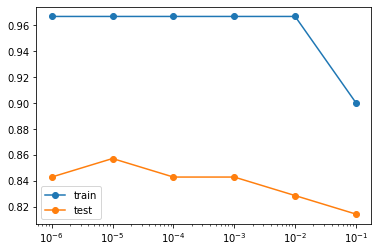

In [24]:
# plot train and test means
plt.semilogx(values, all_train, label='train', marker='o')
plt.semilogx(values, all_test, label='test', marker='o')
plt.legend();

In [25]:
# We can see that using the largest value of 0.1, results in a large drop in both train and test accuracy.

In [ ]:
# For adding regularization to the bias 
# model.add(Dense(32, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

# For adding regularization in CNN
# model.add(Conv2D(32, (3,3), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
# Weight regularization does not seem widely used in CNN models, or if it is used, its use is not widely reported.

# For adding regularization in LSTM
# model.add(LSTM(32, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
# It is common to use weight regularization with LSTM models.
# An often used configuration is L2 (weight decay) and very small hyperparameters (e.g. 10^−6). 
# It is often not reported what weights are regularized (input, recurrent, and/or bias), although one would assume that both 
# input and recurrent weights are regularized only

In [ ]:
'''
    1) Try Alternates. Update the example to use L1 or the combined L1L2 methods instead of L2 regularization.
    2) Report Weight Norm. Update the example to calculate the magnitude of the network weights and demonstrate that regularization indeed made the 
       magnitude smaller.
    3) Regularize Output Layer. Update the example to regularize the output layer of the model and compare the results.
    4) Regularize Bias. Update the example to regularize the bias weight and compare the results.
    5) Repeated Model Evaluation. Update the example to fit and evaluate the model multiple times and report the mean and standard deviation of model performance.
'''